In [127]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

In [128]:
df = pd.read_csv('ccdefault.csv')

In [129]:
X = df.iloc[:, 1:-1].values
y = df['DEFAULT'].values

In [130]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,stratify=y)

In [131]:
forest = RandomForestClassifier(criterion='gini', n_jobs=-1,random_state=1)

In [132]:
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [133]:
params_forest = {'n_estimators':[10,20,30,40,100]}

In [134]:
grid_forest = GridSearchCV(estimator=forest, param_grid=params_forest,scoring='accuracy', cv=10,n_jobs=-1,verbose=1)

In [135]:
grid_forest.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   53.2s finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1, random_state=1),
             n_jobs=-1, param_grid={'n_estimators': [10, 20, 30, 40, 100]},
             scoring='accuracy', verbose=1)

In [136]:
best_hyperparams = grid_forest.best_params_
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'n_estimators': 100}


In [137]:
best_CV_score = grid_forest.best_score_
print('Best CV accuracy:%f'%(best_CV_score))

Best CV accuracy:0.814963


In [138]:
best_model = grid_forest.best_estimator_
test_acc = best_model.score(X_train,y_train)
print("train set accuracy of best model: {:.3f}".format(test_acc))

train set accuracy of best model: 0.999


In [147]:
grid_forest.cv_results_

{'mean_fit_time': array([1.2841047 , 2.0394695 , 3.16299567, 4.12333939, 9.37260139]),
 'std_fit_time': array([0.24063796, 0.10926345, 0.0781213 , 0.11420899, 1.94500789]),
 'mean_score_time': array([0.00782793, 0.010587  , 0.0153693 , 0.01718988, 0.0415195 ]),
 'std_score_time': array([0.00095629, 0.00143943, 0.00317479, 0.0018478 , 0.01020902]),
 'param_n_estimators': masked_array(data=[10, 20, 30, 40, 100],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10},
  {'n_estimators': 20},
  {'n_estimators': 30},
  {'n_estimators': 40},
  {'n_estimators': 100}],
 'split0_test_score': array([0.80740741, 0.81148148, 0.81222222, 0.81592593, 0.81814815]),
 'split1_test_score': array([0.81703704, 0.81888889, 0.82111111, 0.81777778, 0.82333333]),
 'split2_test_score': array([0.82037037, 0.82037037, 0.82851852, 0.82222222, 0.82777778]),
 'split3_test_score': array([0.80962963, 0.81111111, 0.81703704, 0.817777

In [139]:
forest = RandomForestClassifier(n_estimators=100,random_state=1,criterion='gini', n_jobs=-1)

In [140]:
forest.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=1)

In [141]:
importances = forest.feature_importances_
feat_labels = df.columns[1:]
indices = np.argsort(importances)[::-1]

In [142]:
for f in range(X_train.shape[1]): 
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]],importances[indices[f]]))


 1) PAY_0                          0.095727
 2) AGE                            0.066390
 3) BILL_AMT1                      0.061130
 4) LIMIT_BAL                      0.059725
 5) BILL_AMT2                      0.055238
 6) BILL_AMT3                      0.051545
 7) BILL_AMT6                      0.050804
 8) BILL_AMT4                      0.050363
 9) PAY_AMT1                       0.050164
10) BILL_AMT5                      0.049629
11) PAY_AMT2                       0.048499
12) PAY_2                          0.047987
13) PAY_AMT3                       0.046184
14) PAY_AMT6                       0.045861
15) PAY_AMT5                       0.043602
16) PAY_AMT4                       0.042788
17) PAY_3                          0.029097
18) PAY_4                          0.021198
19) EDUCATION                      0.020440
20) PAY_5                          0.019022
21) PAY_6                          0.018649
22) MARRIAGE                       0.014053
23) SEX                         

(-1.0, 23.0)

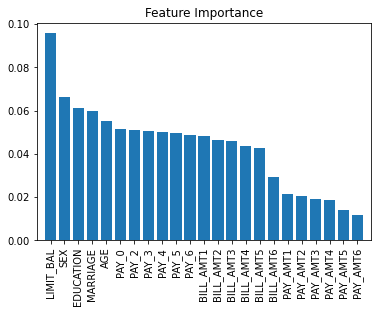

In [143]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices],
align='center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])


In [1]:
print("My name is {Pengjie Ren}")
print("My NetID is: {pengjie2}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Pengjie Ren}
My NetID is: {pengjie2}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
